IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

LOAD DATASET

In [2]:
print("--- LOADING DATASET ---")
try:
    df = pd.read_csv('Spotify_data.csv')
    print("Dataset loaded successfully. First 5 rows:")
    print(df.head())
    print("\nColumn names in the dataset:")
    print(df.columns.tolist())
except FileNotFoundError:
    print("Error: 'Spotify_data.csv' not found. Please ensure the file is uploaded to your Colab environment.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors if file not found

--- LOADING DATASET ---
Dataset loaded successfully. First 5 rows:
   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94

PREPROCESS DATA AND FEATURE ENGINEERING

In [3]:
print("\n--- PREPROCESSING DATA AND FEATURE ENGINEERING ---")
if not df.empty:
    # Check for missing values
    print("\nMissing values before preprocessing:")
    print(df.isnull().sum())

    # 1. Convert 'Explicit' column to numerical (0 for False, 1 for True)
    if 'Explicit' in df.columns:
        df['Explicit'] = df['Explicit'].astype(int)
        print("\n'Explicit' column converted to numerical:")
        print(df['Explicit'].value_counts())
    else:
        print("Warning: 'Explicit' column not found. Skipping conversion.")
        df['Explicit'] = 0 # Default to 0 if not found, or handle as appropriate

    # 2. Extract 'Release_Year' and 'Release_Month' from 'Release Date'
    if 'Release Date' in df.columns:
        df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
        df['Release_Year'] = df['Release Date'].dt.year.fillna(df['Release Date'].dt.year.median()).astype(int)
        df['Release_Month'] = df['Release Date'].dt.month.fillna(df['Release Date'].dt.month.median()).astype(int)
        print("\nNew 'Release_Year' and 'Release_Month' columns created.")
        print(df[['Release Date', 'Release_Year', 'Release_Month']].head())
    else:
        print("Warning: 'Release Date' column not found. Skipping year/month extraction.")
        df['Release_Year'] = 2000 # Default value
        df['Release_Month'] = 1 # Default value

    # Define features (independent variables) and target (dependent variable)
    # IMPORTANT: Ensure these names exactly match your CSV column headers.
    features = [
        'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
        'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
        'Valence', 'Tempo', 'Duration (ms)', # Note: This has a space and parentheses in the CSV
        'Explicit', 'Release_Year', 'Release_Month'
    ]

    # The target variable is 'Popularity' (with capital 'P' as in your CSV)
    target = 'Popularity'

    # Filter features to include only those present in the DataFrame
    available_features = [f for f in features if f in df.columns]
    missing_features = [f for f in features if f not in df.columns]

    if missing_features:
        print(f"\nWarning: The following intended features are missing from the dataframe: {missing_features}. They will be excluded.")

    if target not in df.columns:
        print(f"\nError: Target column '{target}' not found in the dataframe. Cannot proceed with model training.")
        X = pd.DataFrame() # Set X and y to empty to prevent further errors
        y = pd.Series()
    elif not available_features:
        print("\nError: No valid features found in the dataframe. Cannot proceed with model training.")
        X = pd.DataFrame() # Set X and y to empty to prevent further errors
        y = pd.Series()
    else:
        print("\nAll required features and target column are present in the dataframe (or handled).")
        X = df[available_features]
        y = df[target]

        # Handle any remaining NaN values in features (e.g., fill with median/mean)
        for col in X.columns:
            if X[col].isnull().any():
                median_val = X[col].median()
                X[col] = X[col].fillna(median_val)
                print(f"Filled NaN values in '{col}' with median: {median_val}")

        print("Shape of features (X):", X.shape)
        print("Shape of target (y):", y.shape)
else:
    print("DataFrame is empty, skipping preprocessing and feature engineering.")
    X = pd.DataFrame()
    y = pd.Series()



--- PREPROCESSING DATA AND FEATURE ENGINEERING ---

Missing values before preprocessing:
Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

'Explicit' column converted to numerical:
Explicit
0    171
1     56
Name: count, dtype: int64

New 'Release_Year' and 'Release_Month' columns created.
  Release Date  Release_Year  Release_Month
0   2024-05-04          2024              5
1   2024-05-31          2024              5
2   2024-05-23          2024              5
3   2024-04-05          2024              4
4   2024-03-29          2024            

SPLIT DATASET

In [4]:
print("\n--- SPLITTING DATASET ---")
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)
else:
    print("X or y is empty, skipping data splitting.")
    X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series()




--- SPLITTING DATASET ---
Shape of X_train: (181, 15)
Shape of X_test: (46, 15)
Shape of y_train: (181,)
Shape of y_test: (46,)


TRAIN A MODEL

In [5]:

print("\n--- TRAINING THE MODEL ---")
model = None # Initialize model to None
if not X_train.empty and not y_train.empty:
    model = LinearRegression()
    print("Training the Linear Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.")
else:
    print("Training data (X_train or y_train) is empty, skipping model training.")


--- TRAINING THE MODEL ---
Training the Linear Regression model...
Model training complete.


EVALUATE THE MODEL

In [6]:
print("\n--- EVALUATING THE MODEL ---")
if model is not None and not X_test.empty and not y_test.empty:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")

    if r2 > 0.75:
        print("The R2 score indicates a strong model fit.")
    elif r2 > 0.5:
        print("The R2 score indicates a moderate model fit.")
    else:
        print("The R2 score indicates a weak model fit. Consider further feature engineering or different models.")
else:
    print("Model not trained or test data is empty, skipping evaluation.")


--- EVALUATING THE MODEL ---
Mean Squared Error (MSE): 61.6854
Root Mean Squared Error (RMSE): 7.8540
R-squared (R2) Score: 0.0732
The R2 score indicates a weak model fit. Consider further feature engineering or different models.


VISUALIZE ACTUAL VS PREDICTED


--- VISUALIZING RESULTS ---


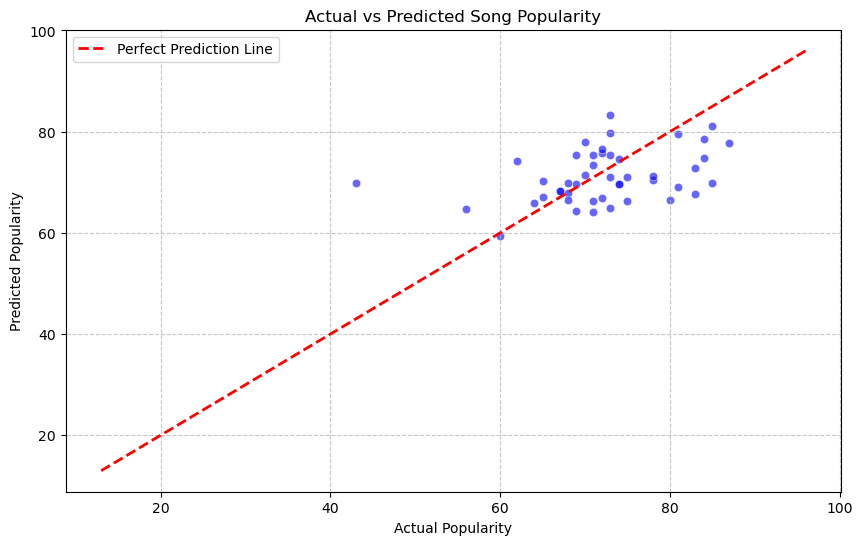

In [7]:
print("\n--- VISUALIZING RESULTS ---")
if 'y_test' in locals() and not y_test.empty and 'y_pred' in locals() and len(y_test) == len(y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='w', linewidth=0.5)
    # Ensure y.min() and y.max() are valid before plotting the line
    if not y.empty:
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction Line')
    plt.xlabel("Actual Popularity")
    plt.ylabel("Predicted Popularity")
    plt.title("Actual vs Predicted Song Popularity")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
else:
    print("Cannot visualize: Test data or predictions are not available or have mismatched lengths.")

SAVE THE MODEL

In [8]:
print("\n--- SAVING THE MODEL ---")
if model is not None:
    model_filename = 'popularity_predictor_final.pkl'
    joblib.dump(model, model_filename)
    print(f"Model saved successfully as '{model_filename}'")
else:
    print("Model was not trained, skipping saving.")



--- SAVING THE MODEL ---
Model saved successfully as 'popularity_predictor_final.pkl'
